## 2012.1.1 - 2017.9.2 Baltimore Victim-Based Crime exploratory data analysis

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# read in kaggle 2012-2017 dataset
df = pd.read_csv("Resources/BPD_Part_1_Victim_Based_Crime_Data.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,9/2/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,9/2/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,9/2/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,9/2/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,9/2/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## Weapon types

In [48]:
# weapon types
print(
    f"""The number of weapon types is {df.Weapon.nunique()}

{df.Weapon.unique()}

{df.Weapon.value_counts()}
"""
)

The number of weapon types is 4

['KNIFE' nan 'FIREARM' 'OTHER' 'HANDS']

Weapon
HANDS      48995
FIREARM    22312
OTHER      14620
KNIFE       9650
Name: count, dtype: int64



## Inside / Outside

Creates dataframe that merges "Outside" and "Inside" with "O" and "I", then drops rows with NA values in df["Inside/Outside"]

In [49]:
# indoor / outdoor
in_out_df = df.copy()
in_out_df["Inside/Outside"] = df["Inside/Outside"].replace(
    {"Outside": "O", "Inside": "I"}
)

in_out_df.dropna(subset=["Inside/Outside"], inplace=True)

print(
    f"""The original data's value counts:
-------
{df['Inside/Outside'].value_counts()}

in_out_df:
-------
{in_out_df['Inside/Outside'].value_counts()}
"""
)

The original data's value counts:
-------
Inside/Outside
O    133619
I    132631
Name: count, dtype: int64

in_out_df:
-------
Inside/Outside
O    133619
I    132631
Name: count, dtype: int64



## Time Series

In [6]:
time_df = df.copy()

# convert day to datetime data type
time_df.CrimeDate = pd.to_datetime(df.CrimeDate)

# supposedly converted time to time object data type
time_df.loc[time_df.CrimeTime == "24:00:00", "CrimeTime"] = "00:00:00"
time_df["CrimeTimeTemp"] = pd.to_datetime(time_df.CrimeTime, format="%H:%M:%S")

# create bins and labels for morning, afternoon, evening, late night
bins = [-1, 6, 12, 18, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening"]

# pd.cut likes ints, so dt.hour extracts the hour for comparison with bins
# this took forever
# why is my computer so mean to me?
time_df["Time of Day"] = pd.cut(time_df.CrimeTimeTemp.dt.hour, bins=bins, labels=labels)
time_df.drop(columns=["CrimeTimeTemp"], inplace=True)
time_df["Day of Week"] = time_df["CrimeDate"].dt.day_name()

time_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Time of Day,Day of Week
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,Evening,Saturday
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,Evening,Saturday
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,Evening,Saturday
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,Evening,Saturday
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,Evening,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,0:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,Late Night,Sunday
276525,2012-01-01,0:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,Late Night,Sunday
276526,2012-01-01,0:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,Late Night,Sunday
276527,2012-01-01,0:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,Late Night,Sunday


In [50]:
time_df["Time of Day"].value_counts()

Time of Day
Afternoon     89215
Evening       74286
Morning       62452
Late Night    50576
Name: count, dtype: int64

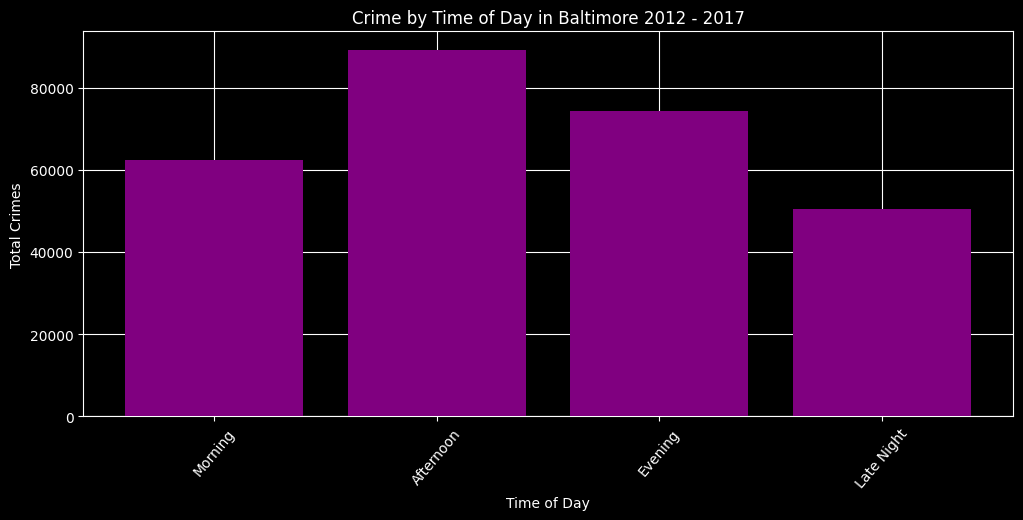

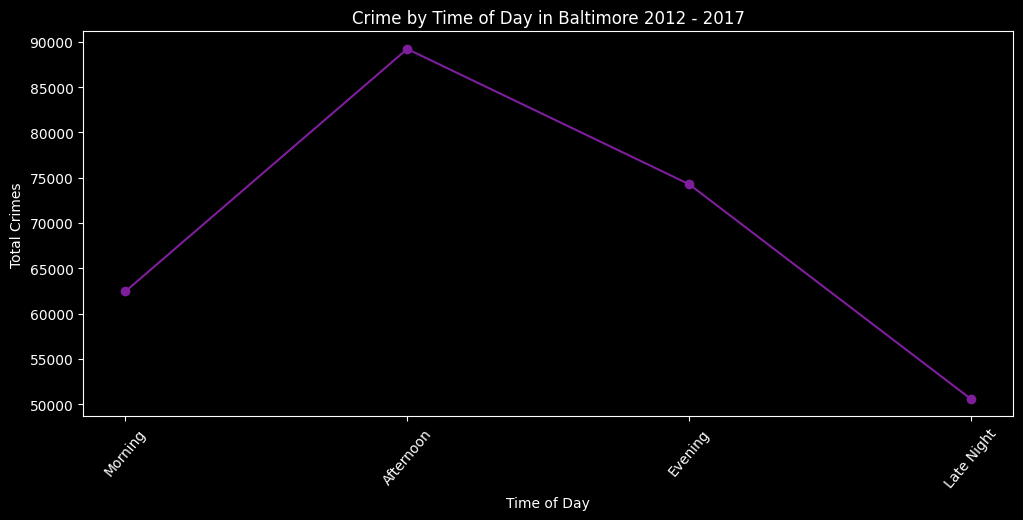

In [38]:
# Group Time of Day category with Total Crimes
time_crime = time_df.groupby('Time of Day').size().reset_index(name = 'Total_Crimes')

# Plot bar chart
plt.figure(figsize=(12, 5))
plt.bar(time_crime['Time of Day'], time_crime['Total_Crimes'], color ='purple', zorder = 3 )
plt.xlabel('Time of Day')
plt.ylabel('Total Crimes')
plt.title('Crime by Time of Day in Baltimore 2012 - 2017')
plt.xticks(rotation=50)

# Set categorical order
time_df['Time of Day'] = pd.Categorical(time_df['Time of Day'],
                                   categories=['Morning', 'Afternoon', 'Evening', 'Late Night'],
                                   ordered=True)

# Change and format bar style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')
plt.grid()
plt.grid(zorder=0)

# Display bar chart
plt.show()


time_crime = time_df.groupby('Time of Day').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(12, 5))
plt.plot(time_crime['Time of Day'], time_crime['Total_Crimes'], marker='o', linestyle='-', color='#7E1E9C', zorder = 3 )

# Set categorical order
time_df['Time of Day'] = pd.Categorical(time_df['Time of Day'],
                                   categories=['Morning', 'Afternoon', 'Evening', 'Late Night'],
                                   ordered=True)

# # Change and format bar style
# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('dark_background')
# plt.grid()
# plt.grid(zorder=0)

plt.xlabel('Time of Day')
plt.ylabel('Total Crimes')
plt.title('Crime by Time of Day in Baltimore 2012 - 2017')
plt.xticks(rotation=50)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')


In [39]:
day_df =  time_df["Day of Week"].value_counts()
day_df

Day of Week
Friday       41596
Monday       40239
Wednesday    39752
Tuesday      39741
Thursday     39387
Saturday     38612
Sunday       37202
Name: count, dtype: int64

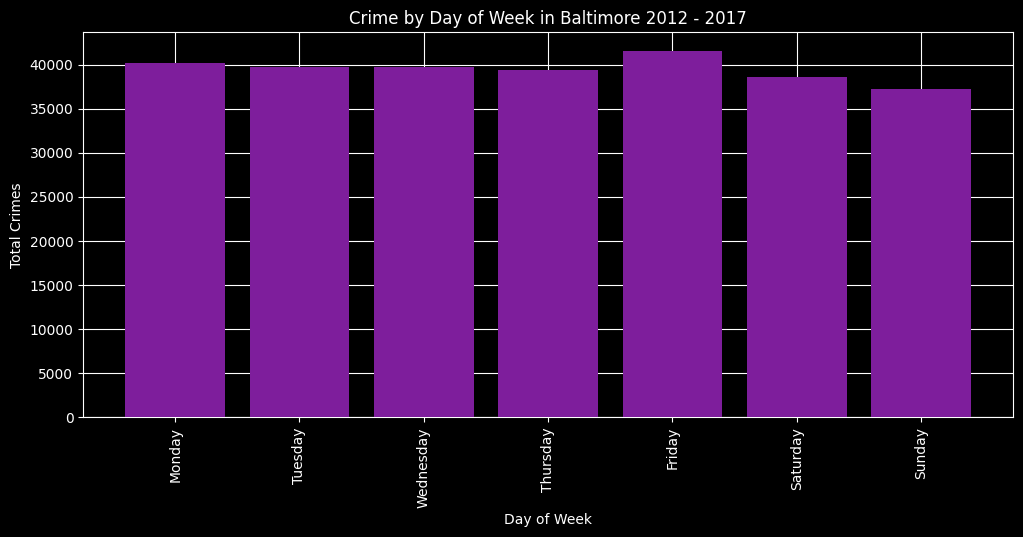

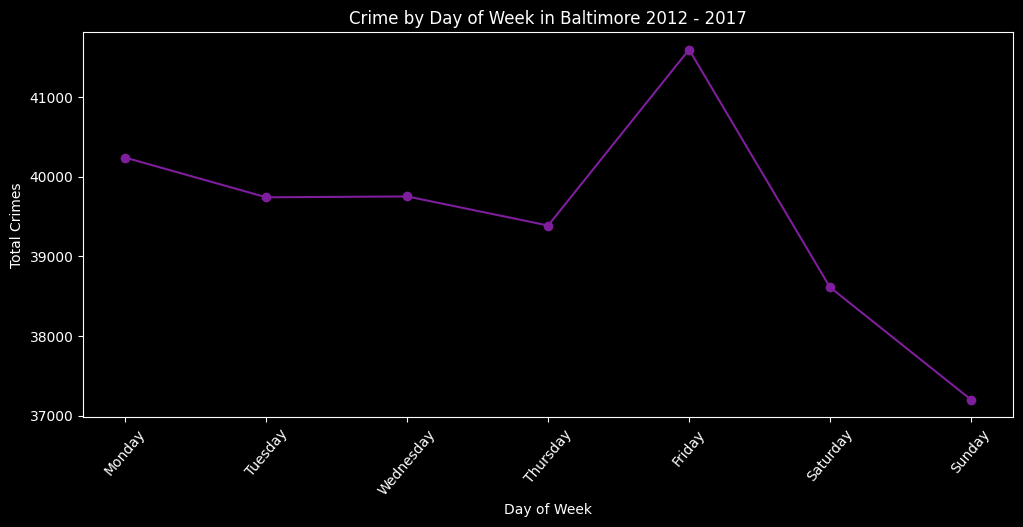

In [64]:

day_of_week_crime = time_df.groupby('Day of Week').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(12, 5))
plt.bar(day_of_week_crime['Day of Week'], day_of_week_crime['Total_Crimes'], color='#7E1E9C', zorder = 3)

# Set categorical order
time_df['Day of Week'] = pd.Categorical(time_df['Day of Week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                               'Saturday', 'Sunday'],
                                   ordered=True)

# Change and format bar style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')
plt.grid()
plt.grid(zorder=0)


plt.xlabel('Day of Week')
plt.ylabel('Total Crimes')
plt.title('Crime by Day of Week in Baltimore 2012 - 2017')
plt.xticks(rotation=90)
plt.show()



day_of_week_crime = time_df.groupby('Day of Week').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(12, 5))
plt.plot(day_of_week_crime['Day of Week'], day_of_week_crime['Total_Crimes'], marker='o', linestyle='-', color='#7E1E9C', zorder = 3 )

# Set categorical order
time_df['Day of Week'] = pd.Categorical(time_df['Day of Week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                               'Saturday', 'Sunday'],
                                   ordered=True)

# # Change and format bar style
# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('dark_background')
# plt.grid()
# plt.grid(zorder=0)


plt.xlabel('Day of Week')
plt.ylabel('Total Crimes')
plt.title('Crime by Day of Week in Baltimore 2012 - 2017')
plt.xticks(rotation=50)
plt.show()





## Crime Description

In [15]:
desc_df = df.copy()

print(
    f"""The original value counts:
-----
{desc_df.Description.value_counts()}      
      
"""
)

# Do we wanna clean that?

The original value counts:
-----
Description
LARCENY                 60528
COMMON ASSAULT          45518
BURGLARY                42538
LARCENY FROM AUTO       36295
AGG. ASSAULT            27513
AUTO THEFT              26838
ROBBERY - STREET        17691
ROBBERY - COMMERCIAL     4141
ASSAULT BY THREAT        3503
SHOOTING                 2910
ROBBERY - RESIDENCE      2866
RAPE                     1637
HOMICIDE                 1559
ROBBERY - CARJACKING     1528
ARSON                    1464
Name: count, dtype: int64      
      



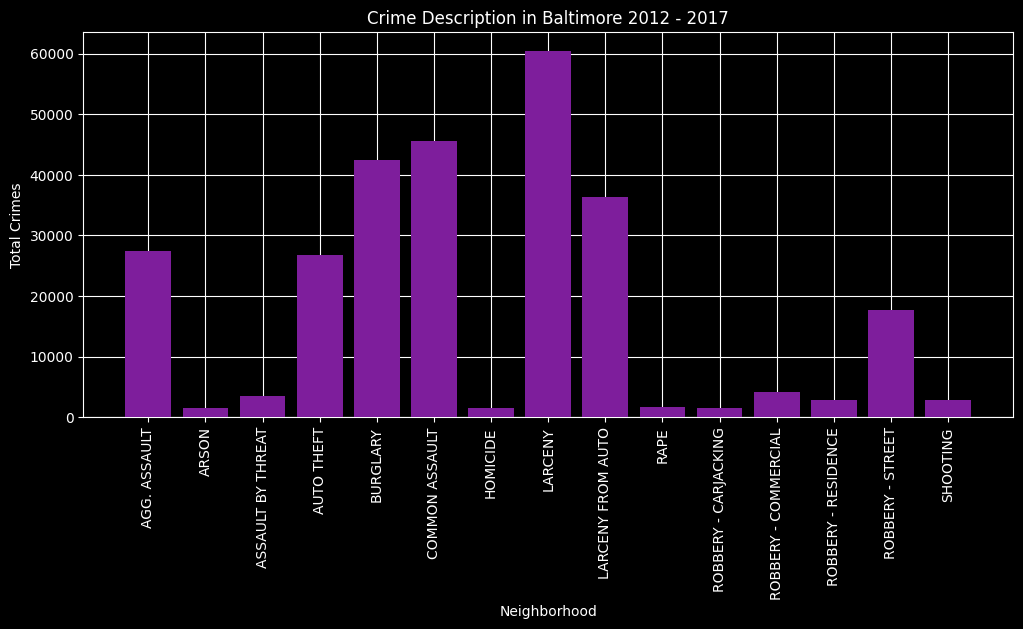

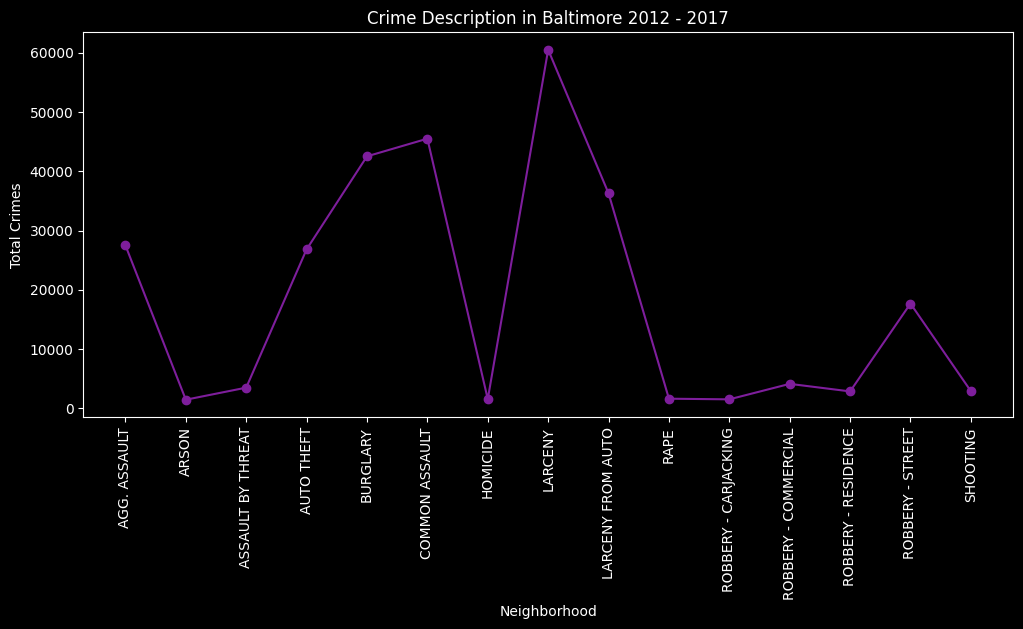

In [37]:
desc_crime = desc_df.groupby('Description').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(12, 5))
plt.bar(desc_crime['Description'], desc_crime['Total_Crimes'], color='#7E1E9C', zorder = 3)

# Change and format bar style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')
plt.grid()
plt.grid(zorder=0)

plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.title('Crime Description in Baltimore 2012 - 2017')
plt.xticks(rotation=90)
plt.show()

desc_crime = desc_df.groupby('Description').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(12, 5))
plt.plot(desc_crime['Description'], desc_crime['Total_Crimes'], marker='o', linestyle='-', color='#7E1E9C', zorder = 3 )

plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.title('Crime Description in Baltimore 2012 - 2017')
plt.xticks(rotation=90)
plt.show()

## Premises Type

In [11]:
building_df = df.copy()

print(
    f"""The original value counts:
-----
{building_df.Premise.value_counts()}      
      
"""
)

# gotta drop some of these
# save to csv to see the entire 123 values before dropping
tmp = building_df.Premise.value_counts()
tmp.to_csv("premises_types.csv")

The original value counts:
-----
Premise
STREET        100919
ROW/TOWNHO     60502
PARKING LO     12043
APT/CONDO      12002
OTHER - IN     11459
               ...  
Private Sc         2
Day Care F         1
Church             1
MANUFACTUR         1
Gas Statio         1
Name: count, Length: 123, dtype: int64      
      



In [28]:
# premise_crime = building_df.groupby('Premise').size().reset_index(name = 'Total_Crimes')

# plt.figure(figsize=(12, 5))
# plt.bar(premise_crime['Premise'], premise_crime['Total_Crimes'])
# plt.xlabel('Premise')
# plt.ylabel('Total Crimes')
# plt.title('Premise Crime in Baltimore')
# plt.xticks(rotation=90)
# plt.show()

## Total Incidents

In [13]:
incidents_df = df.copy()

print(
    f"""The original value counts:
-----
{incidents_df["Total Incidents"].value_counts()}      
      
"""
)

# check to see if there are multiple incidents at the same address and time
# which clearly happens in the 2012-2021 df
# or... we just ignore it

The original value counts:
-----
Total Incidents
1    276529
Name: count, dtype: int64      
      



## Location

In [14]:
loc_df = df.copy()

print(
    f"""The original value counts per district:
-----
{loc_df.District.value_counts()}      
      
The original value counts per neighborhood:
-----
{loc_df.Neighborhood.value_counts()}
"""
)

The original value counts per district:
-----
District
NORTHEASTERN    43006
SOUTHEASTERN    38291
SOUTHERN        31850
NORTHERN        31665
CENTRAL         31631
NORTHWESTERN    28061
SOUTHWESTERN    26092
EASTERN         23635
WESTERN         22218
Name: count, dtype: int64      
      
The original value counts per neighborhood:
-----
Neighborhood
Downtown                   9048
Frankford                  6642
Belair-Edison              5977
Brooklyn                   4516
Cherry Hill                4086
                           ... 
Villages Of Homeland         37
Greenmount Cemetery          23
Mt Pleasant Park             13
Blythewood                    4
Dundalk Marine Terminal       1
Name: count, Length: 278, dtype: int64



In [29]:
# crime_per_neighborhood = df.groupby('Neighborhood').size().reset_index(name='Total_Crimes')

# #Plot Crime per Neighborhood
# plt.figure(figsize=(12, 5))
# plt.bar(crime_per_neighborhood['Neighborhood'],crime_per_neighborhood['Total_Crimes'])
# plt.xlabel('Neighborhood')
# plt.ylabel('Total Crimes')
# plt.title('Crime per Neighborhood in Baltimore')
# plt.xticks(rotation=90)
# #plt.tight_layout()
# plt.show()
        